# EAS 503 Final Project

In [1]:
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

In [2]:
def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [3]:
def ChestPainTypeTable(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [ChestPainType]([ChestPainTypeID] INTEGER NOT NULL PRIMARY KEY,
                                     [ChestPainType] TEXT NOT NULL);""")
    ls = []
    with open('heart_updated.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            name = []
            for i in ls[1:]:
                n = i.split(',')[2]
                if n not in name:
                    name.append(n)
            name.sort()
            
            sql = '''INSERT INTO ChestPainType(ChestPainType) VALUES(?)'''
            with normalized_conn:
                for i in name:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [4]:
conn = sqlite3.connect("heart.db")

In [5]:
ChestPainTypeTable( "heart_updated.csv","heart.db")

FileNotFoundError: [Errno 2] No such file or directory: 'heart_updated.csv'

In [11]:
def RestingECGTable(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [RestingECG]([RestingECGID] INTEGER NOT NULL PRIMARY KEY,
                                     [RestingECG] TEXT NOT NULL);""")
    ls = []
    with open('heart_updated.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            name = []
            for i in ls[1:]:
                n = i.split(',')[6]
                if n not in name:
                    name.append(n)
            name.sort()
            
            sql = '''INSERT INTO RestingECG(RestingECG) VALUES(?)'''
            with normalized_conn:
                for i in name:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [13]:
RestingECGTable( "heart_updated.csv","heart.db")

In [15]:
def ST_SlopeTable(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [ST_Slope]([ST_SlopeID] INTEGER NOT NULL PRIMARY KEY,
                                     [ST_Slope] TEXT NOT NULL);""")
    ls = []
    with open('heart_updated.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            name = []
            for i in ls[1:]:
                n = i.split(',')[10]
                if n not in name:
                    name.append(n)
            name.sort()
            
            sql = '''INSERT INTO ST_Slope(ST_Slope) VALUES(?)'''
            with normalized_conn:
                for i in name:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [17]:
ST_SlopeTable( "heart_updated.csv","heart.db")

In [19]:
def ageCategoryTable(data_filename, normalized_database_filename):
    
    normalized_conn = create_connection(normalized_database_filename)
    create_table(normalized_conn,"""CREATE TABLE IF NOT Exists [ageCategory]([ageCategoryID] INTEGER NOT NULL PRIMARY KEY,
                                     [ageCategory] TEXT NOT NULL);""")
    ls = []
    with open('heart_updated.csv','r') as file:
            for line in file:
                if not line.strip():
                    continue
                ls.append(line.strip())
            name = []
            for i in ls[1:]:
                n = i.split(',')[12]
                if n not in name:
                    name.append(n)
            name.sort()
            
            sql = '''INSERT INTO ageCategory(ageCategory) VALUES(?)'''
            with normalized_conn:
                for i in name:
                    normalized_conn.execute(sql,(i,))
            normalized_conn.close()

In [21]:
ageCategoryTable( "heart_updated.csv","heart.db")

In [23]:
def chestpaintype_chestpaintypeid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT ChestPainTypeID, ChestPainType FROM ChestPainType'''
    data = execute_sql_statement(sql_statement,normalized_conn)
    ddict = {}
    for i in data:
        v,k = i
        ddict[k] = v
    return ddict
    print(ddict)

In [25]:
chestpaintype_chestpaintypeid("heart.db")

{'ASY': 1, 'ATA': 2, 'NAP': 3, 'TA': 4}

In [27]:
def restingecg_restingecgid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT RestingECGID, RestingECG FROM RestingECG'''
    data = execute_sql_statement(sql_statement,normalized_conn)
    ddict = {}
    for i in data:
        v,k = i
        ddict[k] = v
    return ddict

In [29]:
restingecg_restingecgid("heart.db")

{'LVH': 1, 'Normal': 2, 'ST': 3}

In [31]:
def stslope_stslopeid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT ST_SlopeID, ST_Slope FROM ST_Slope'''
    data = execute_sql_statement(sql_statement,normalized_conn)
    ddict = {}
    for i in data:
        v,k = i
        ddict[k] = v
    return ddict

In [33]:
stslope_stslopeid("heart.db")

{'Down': 1, 'Flat': 2, 'Up': 3}

In [35]:
def agecategory_agecategoryid(normalized_database_filename):
    normalized_conn = create_connection(normalized_database_filename)
    sql_statement = '''SELECT ageCategoryID, ageCategory FROM ageCategory'''
    data = execute_sql_statement(sql_statement,normalized_conn)
    ddict = {}
    for i in data:
        v,k = i
        ddict[k] = v
    return ddict

In [37]:
agecategory_agecategoryid("heart.db")

{'Mid Aged': 1, 'Old': 2, 'Young': 3}

In [39]:
import csv

def read_csv_and_map(file_path, chest_pain_dict, resting_ecg_dict, st_slope_dict, age_category_dict):
    """
    Reads the CSV file and maps categorical data to IDs using the provided dictionaries.
    """
    mapped_data = []
    
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file) 
        for row in reader:
            age = int(row["Age"])
            sex = row["Sex"]
            resting_bp = int(row["RestingBP"])
            cholesterol = int(row["Cholesterol"])
            fasting_bs = int(row["FastingBS"])
            max_hr = int(row["MaxHR"])
            exercise_angina = row["ExerciseAngina"]
            oldpeak = float(row["Oldpeak"])
            heart_disease = int(row["HeartDisease"])
            
            chest_pain_type_id = chest_pain_dict.get(row["ChestPainType"])
            resting_ecg_id = resting_ecg_dict.get(row["RestingECG"])
            st_slope_id = st_slope_dict.get(row["ST_Slope"])
            age_category_id = age_category_dict.get(row["ageCategory"])
            
            mapped_data.append((
                age, sex, resting_bp, cholesterol, fasting_bs, max_hr, exercise_angina, oldpeak, heart_disease,
                chest_pain_type_id, resting_ecg_id, st_slope_id, age_category_id
            ))
    
    return mapped_data

file_path = "heart_updated.csv"

mapped_data = read_csv_and_map(
    file_path,
    chestpaintype_chestpaintypeid("heart.db"),
    restingecg_restingecgid("heart.db"),
    stslope_stslopeid("heart.db"),
    agecategory_agecategoryid("heart.db")
)


def insert_main_data(conn, data):
    try:
        create_main_table = """
        CREATE TABLE IF NOT EXISTS HeartData (
            ID INTEGER PRIMARY KEY,
            Age INTEGER,
            Sex TEXT,
            RestingBP INTEGER,
            Cholesterol INTEGER,
            FastingBS INTEGER,
            MaxHR INTEGER,
            ExerciseAngina TEXT,
            Oldpeak REAL,
            HeartDisease INTEGER,
            ChestPainTypeID INTEGER,
            RestingECGID INTEGER,
            ST_SlopeID INTEGER,
            AgeCategoryID INTEGER,
            FOREIGN KEY (ChestPainTypeID) REFERENCES ChestPainType (ChestPainTypeID),
            FOREIGN KEY (RestingECGID) REFERENCES RestingECG (RestingECGID),
            FOREIGN KEY (ST_SlopeID) REFERENCES ST_Slope (ST_SlopeID),
            FOREIGN KEY (AgeCategoryID) REFERENCES AgeCategory (AgeCategoryID)
        );
        """
        create_table(conn, create_main_table)
        
        cur = conn.cursor()
        cur.executemany("""
            INSERT INTO HeartData (Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, ExerciseAngina, Oldpeak, HeartDisease, ChestPainTypeID, RestingECGID, ST_SlopeID, AgeCategoryID)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, data)
        conn.commit()
    except Error as e:
        print(e)
        

insert_main_data(conn, mapped_data)


In [41]:
import sqlite3
import pandas as pd

def fetch_data_into_dataframe(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    
    # SQL query to join tables
    query = """
    SELECT 
        hd.ID,
        hd.Age,
        hd.Sex,
        hd.RestingBP,
        hd.Cholesterol,
        hd.FastingBS,
        hd.MaxHR,
        hd.ExerciseAngina,
        hd.Oldpeak,
        hd.HeartDisease,
        cpt.ChestPainType,
        recg.RestingECG,
        sts.ST_Slope,
        ac.ageCategory
    FROM 
        HeartData hd
    JOIN 
        ChestPainType cpt ON hd.ChestPainTypeID = cpt.ChestPainTypeID
    JOIN 
        RestingECG recg ON hd.RestingECGID = recg.RestingECGID
    JOIN 
        ST_Slope sts ON hd.ST_SlopeID = sts.ST_SlopeID
    JOIN 
        AgeCategory ac ON hd.AgeCategoryID = ac.ageCategoryID;
    """
    
    df = pd.read_sql_query(query, conn)

    conn.close()
    
    return df


db_path = "heart.db"
df = fetch_data_into_dataframe(db_path)

print(df.head())


   ID  Age Sex  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  \
0   1   40   M        140          289          0    172              N   
1   2   49   F        160          180          0    156              N   
2   3   37   M        130          283          0     98              N   
3   4   48   F        138          214          0    108              Y   
4   5   54   M        150          195          0    122              N   

   Oldpeak  HeartDisease ChestPainType RestingECG ST_Slope ageCategory  
0      0.0             0           ATA     Normal       Up    Mid Aged  
1      1.0             1           NAP     Normal     Flat    Mid Aged  
2      0.0             0           ATA         ST       Up       Young  
3      1.5             1           ASY     Normal     Flat    Mid Aged  
4      0.0             0           NAP     Normal       Up    Mid Aged  


In [43]:
# Load the dataset
file_path = "heart_updated.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Check for null values in each column
null_values = df.isnull().sum()

# Display the result
print("Null values in each column:")
print(null_values)

# Optional: Display total number of null values
total_nulls = df.isnull().sum().sum()
print(f"\nTotal number of null values in the dataset: {total_nulls}")


Null values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
ageCategory       0
dtype: int64

Total number of null values in the dataset: 0


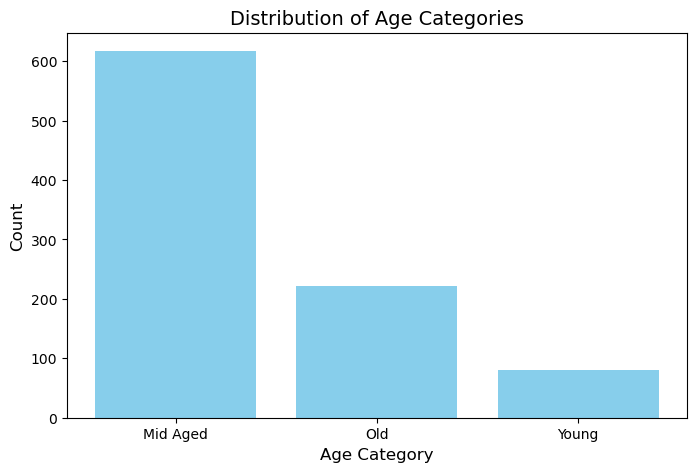

In [45]:
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect("heart.db")

query = """
SELECT ageCategory.ageCategory as ageCategory, COUNT(*) as count
FROM HeartData
JOIN ageCategory ON HeartData.ageCategoryId = ageCategory.ageCategoryId
GROUP BY ageCategory.ageCategory;
"""
cursor = conn.cursor()
cursor.execute(query)
age_category_data = cursor.fetchall()


categories = [row[0] for row in age_category_data]
counts = [row[1] for row in age_category_data]

plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color='skyblue')
plt.title("Distribution of Age Categories", fontsize=14)
plt.xlabel("Age Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


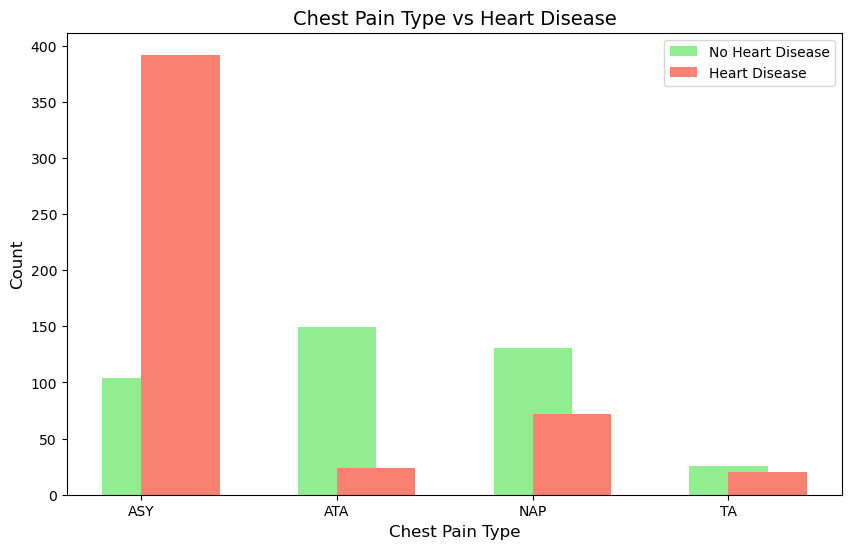

In [47]:

query = """
SELECT ChestPainType.ChestPainType as ChestPainType, 
       SUM(CASE WHEN HeartData.heartDisease = 0 THEN 1 ELSE 0 END) as No_Heart_Disease,
       SUM(CASE WHEN HeartData.heartDisease = 1 THEN 1 ELSE 0 END) as Heart_Disease
FROM HeartData
JOIN chestPainType ON HeartData.ChestPainTypeId = ChestPainType.ChestPainTypeId
GROUP BY ChestPainType.ChestPainType;
"""
cursor.execute(query)
chest_pain_data = cursor.fetchall()

categories = [row[0] for row in chest_pain_data]
no_hd = [row[1] for row in chest_pain_data]
hd = [row[2] for row in chest_pain_data]

x = range(len(categories))
plt.figure(figsize=(10, 6))
plt.bar(x, no_hd, width=0.4, label="No Heart Disease", color="lightgreen", align="center")
plt.bar(x, hd, width=0.4, label="Heart Disease", color="salmon", align="edge")
plt.xticks(x, categories)
plt.title("Chest Pain Type vs Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.show()


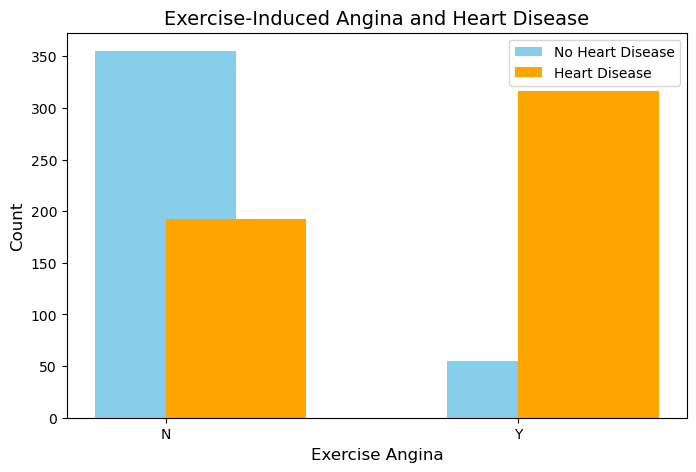

In [49]:

query = """
SELECT exerciseAngina, 
       SUM(CASE WHEN HeartData.heartDisease = 0 THEN 1 ELSE 0 END) as No_Heart_Disease,
       SUM(CASE WHEN HeartData.heartDisease = 1 THEN 1 ELSE 0 END) as Heart_Disease
FROM HeartData
GROUP BY exerciseAngina;
"""
cursor.execute(query)
angina_data = cursor.fetchall()

categories = [row[0] for row in angina_data]
no_hd = [row[1] for row in angina_data]
hd = [row[2] for row in angina_data]

# Plot
x = range(len(categories))
plt.figure(figsize=(8, 5))
plt.bar(x, no_hd, width=0.4, label="No Heart Disease", color="skyblue", align="center")
plt.bar(x, hd, width=0.4, label="Heart Disease", color="orange", align="edge")
plt.xticks(x, categories)
plt.title("Exercise-Induced Angina and Heart Disease", fontsize=14)
plt.xlabel("Exercise Angina", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.show()


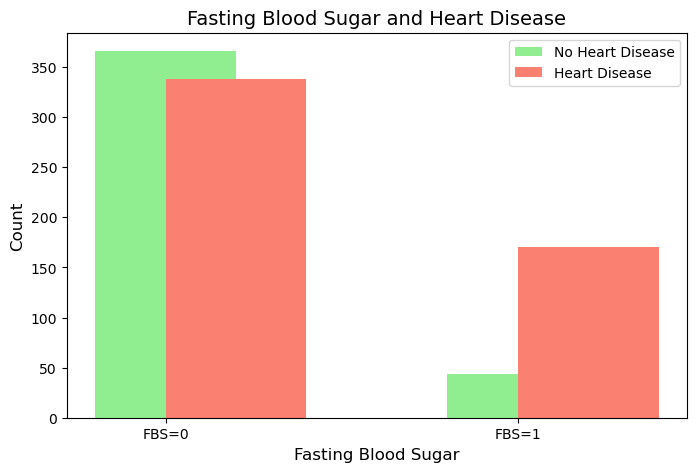

In [51]:

query = """
SELECT HeartData.fastingBS, 
       COUNT(CASE WHEN HeartData.heartDisease = 0 THEN 1 ELSE NULL END) as No_Heart_Disease,
       COUNT(CASE WHEN HeartData.heartDisease = 1 THEN 1 ELSE NULL END) as Heart_Disease
FROM HeartData
GROUP BY HeartData.fastingBS;
"""
cursor.execute(query)
fbs_data = cursor.fetchall()

fbs_categories = ["FBS=0", "FBS=1"]
no_hd = [row[1] for row in fbs_data]
hd = [row[2] for row in fbs_data]

# Plot
x = range(len(fbs_categories))
plt.figure(figsize=(8, 5))
plt.bar(x, no_hd, width=0.4, label="No Heart Disease", color="lightgreen", align="center")
plt.bar(x, hd, width=0.4, label="Heart Disease", color="salmon", align="edge")
plt.xticks(x, fbs_categories)
plt.title("Fasting Blood Sugar and Heart Disease", fontsize=14)
plt.xlabel("Fasting Blood Sugar", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.show()


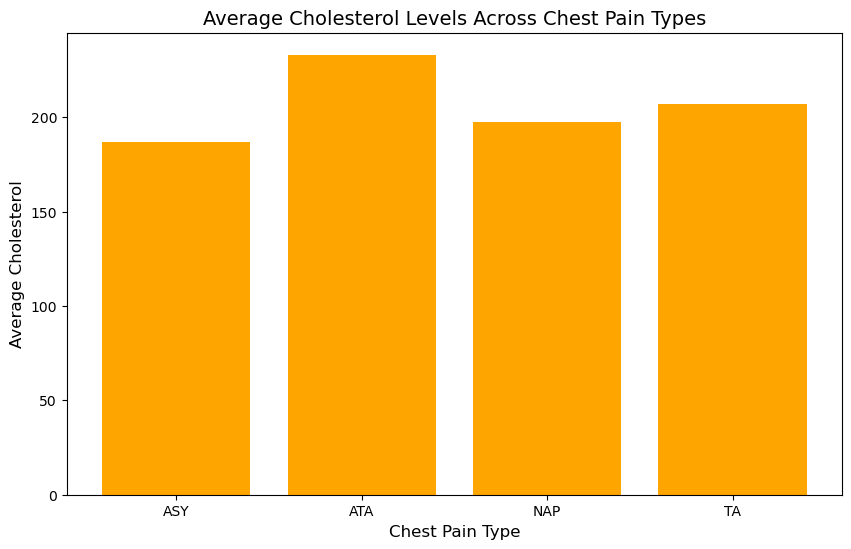

In [53]:

query = """
SELECT ChestPainType.ChestPainType as ChestPainType, AVG(HeartData.cholesterol) as AvgCholesterol
FROM HeartData
JOIN ChestPainType ON HeartData.ChestPainTypeId = ChestPainType.ChestPainTypeId
GROUP BY ChestPainType.ChestPainType;
"""
cursor.execute(query)
cholesterol_data = cursor.fetchall()

chest_pain_types = [row[0] for row in cholesterol_data]
avg_cholesterol = [row[1] for row in cholesterol_data]

plt.figure(figsize=(10, 6))
plt.bar(chest_pain_types, avg_cholesterol, color='orange')
plt.title("Average Cholesterol Levels Across Chest Pain Types", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Average Cholesterol", fontsize=12)
plt.show()


In [55]:

query = """
SELECT HeartData.age, 
       HeartData.sex, 
       HeartData.restingBP, 
       HeartData.cholesterol, 
       HeartData.fastingBS, 
       HeartData.maxHR, 
       HeartData.exerciseAngina,
       HeartData.oldpeak,
       HeartData.heartDisease,
       ChestPainType.ChestPainTypeId AS chestPainType,
       RestingECG.RestingECGId AS restingECG,
       ST_Slope.ST_SlopeId AS st_slope,
       ageCategory.ageCategoryId AS age_category
FROM HeartData
JOIN ChestPainType ON HeartData.ChestPainTypeId = ChestPainType.ChestPainTypeId
JOIN RestingECG ON HeartData.restingECGId = RestingECG.RestingECGId
JOIN ST_Slope ON HeartData.ST_SlopeId = ST_Slope.ST_SlopeId
JOIN ageCategory ON HeartData.ageCategoryId = ageCategory.ageCategoryId;
"""
cursor.execute(query)
data = cursor.fetchall()

columns = [description[0] for description in cursor.description]


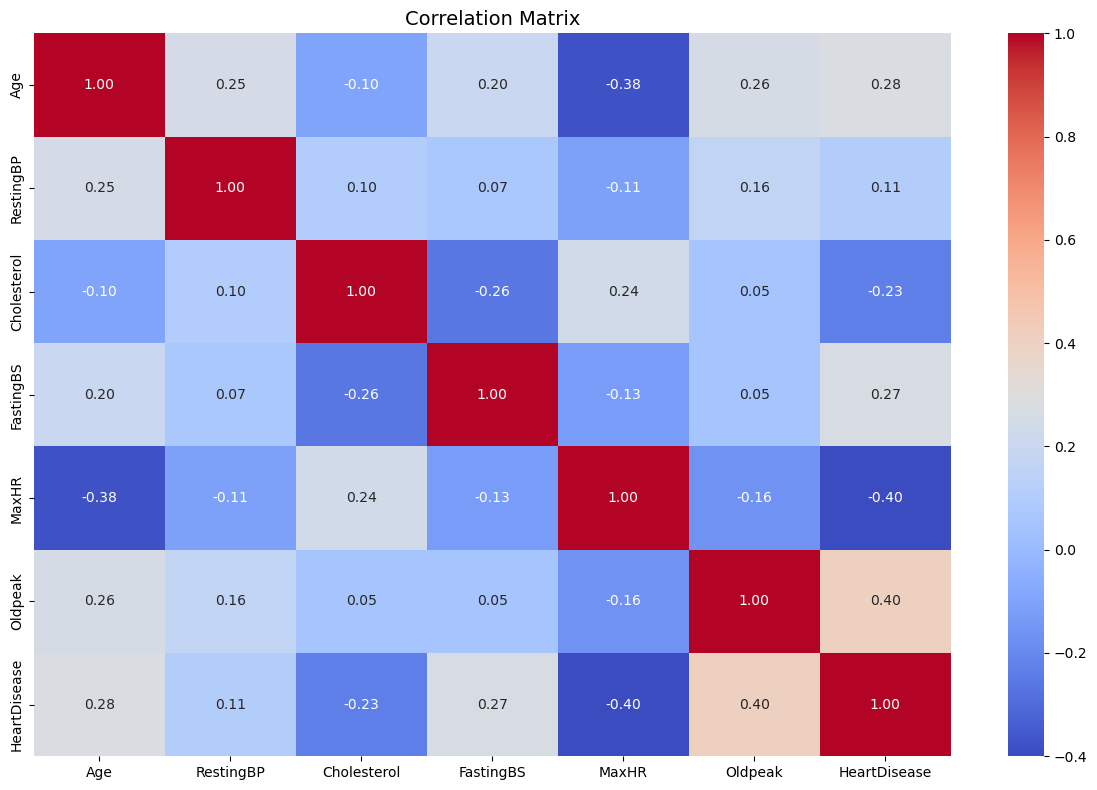

In [197]:
import seaborn as sns
# Database connection
db_path = "heart.db"  # Replace with your actual database path
conn = sqlite3.connect(db_path)

# SQL query to fetch numerical columns for correlation
query = """
SELECT Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease
FROM HeartData;
"""

# Execute the query and load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()

import pandas as pd

df = pd.DataFrame(data, columns=columns)

print(df.head())


In [61]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})


In [63]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,chestPainType,restingECG,st_slope,age_category
0,40,1,140,289,0,172,0,0.0,0,2,2,3,1
1,49,0,160,180,0,156,0,1.0,1,3,2,2,1
2,37,1,130,283,0,98,0,0.0,0,2,3,3,3
3,48,0,138,214,0,108,1,1.5,1,1,2,2,1
4,54,1,150,195,0,122,0,0.0,0,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,4,2,2,1
914,68,1,144,193,1,141,0,3.4,1,1,2,2,2
915,57,1,130,131,0,115,1,1.2,1,1,2,2,1
916,57,0,130,236,0,174,0,0.0,1,2,1,2,1


In [65]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop(columns=["HeartDisease"])  # Drop the target column (Heart Disease)
y = df["HeartDisease"]  # Target column (Heart Disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



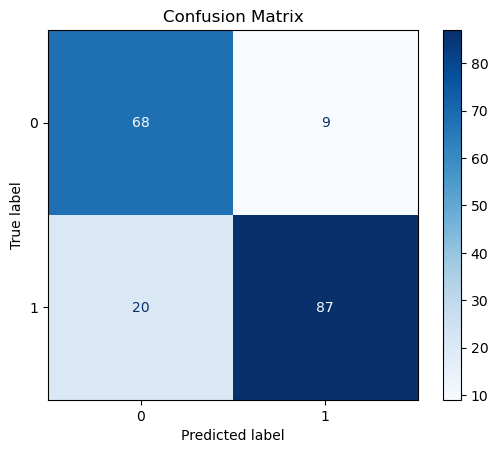

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
clf = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.79        77
           1       0.87      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



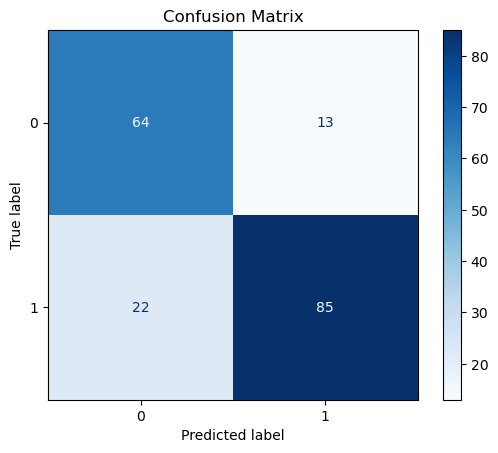

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



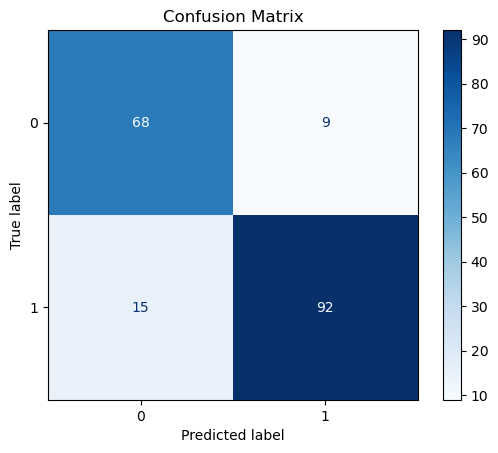

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



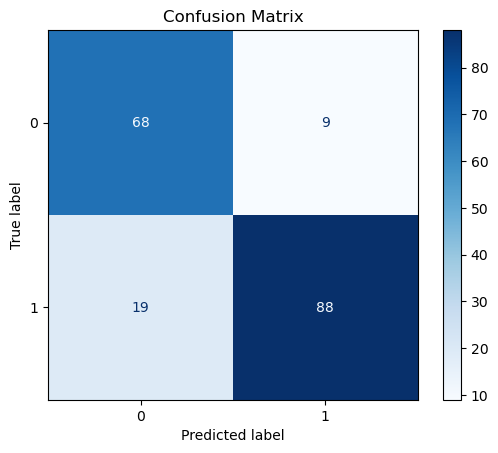

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the SVM classifier
clf = SVC(kernel='linear', random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [75]:
%pip install -q dagshub mlflow



Note: you may need to restart the kernel to use updated packages.


In [147]:
import dagshub
dagshub.init(repo_owner='diya.pati.1998', repo_name='Final_project_EAS503', mlflow=True)



Initialized MLflow to track repo "diya.pati.1998/Final_project_EAS503"

Repository diya.pati.1998/Final_project_EAS503 initialized!

In [149]:
F1_dictionary={}

Experiment 1 :-

2024/12/19 19:09:42 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_1' does not exist. Creating a new experiment.


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



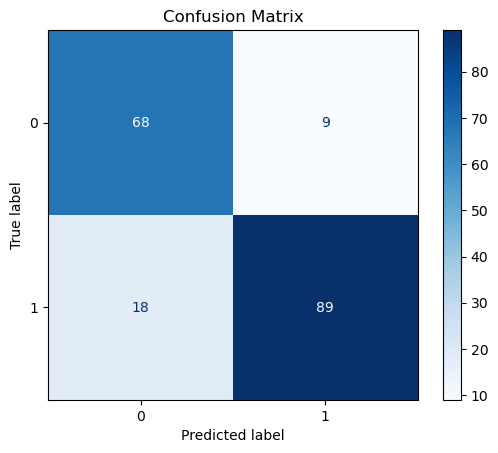

2024/12/19 19:09:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run zealous-stork-935 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/0/runs/2da0b67db05a460b9f3e444f6ac48b07
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/0


In [151]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing features and target column
# Features (X) and target variable (y)
X = df.drop(columns=["HeartDisease"])  # Drop the target column (Heart Disease)
y = df["HeartDisease"]  # Target column (Heart Disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline
def create_pipeline():
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns  # Auto-detect numeric features
    categorical_features = X.select_dtypes(include=['object']).columns  # Auto-detect categorical features
    
    # Preprocessing steps
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('minmax', MinMaxScaler()),
        ('log', FunctionTransformer(np.log1p, validate=True))
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    
    # Full pipeline
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', model)])
    return full_pipeline

# Hyperparameter tuning and cross-validation
def run_experiment(X_train, y_train, X_test, y_test):
    # Set the experiment name in MLFlow (creates a new experiment or uses an existing one)
    mlflow.set_experiment('Experiment_1')  # This sets the experiment name
    
    # Create the pipeline
    pipeline = create_pipeline()

    # Hyperparameter tuning with GridSearchCV
    param_grid = {
        'model__C': [0.1, 1, 10],  # Regularization parameter
        'model__penalty': ['l2'],  # Penalty type for Logistic Regression
        'model__solver': ['liblinear']  # Solver choice
    }
    
    # 3-fold cross-validation for grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)

    # Log the experiment with MLFlow
    with mlflow.start_run():
        grid_search.fit(X_train, y_train)
        
        # Log the best parameters
        mlflow.log_params(grid_search.best_params_)
        
        # Predict on the test set
        y_pred = grid_search.predict(X_test)
        
        # Generate and log the classification report
        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)
        mlflow.log_text(report, "classification_report.txt")
        
        # Generate and log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        mlflow.log_metric('f1_score', f1_score(y_test, y_pred))
        F1_dictionary["Experiment_1"]=f1_score(y_test, y_pred)
        mlflow.log_metric('TN', tn)
        mlflow.log_metric('FP', fp)
        mlflow.log_metric('FN', fn)
        mlflow.log_metric('TP', tp)
        
        # Log confusion matrix plot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format="d")
        plt.title("Confusion Matrix")
        plt.show()
        
        # Log the model
        mlflow.sklearn.log_model(grid_search.best_estimator_, 'model')
        
        # Optionally log the entire grid search object
        # mlflow.log_artifact(grid_search.cv_results_)

# Run the experiment
run_experiment(X_train, y_train, X_test, y_test)


2024/12/19 19:10:03 INFO mlflow.tracking.fluent: Experiment with name 'Experiment-2' does not exist. Creating a new experiment.


Training Logistic Regression...
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



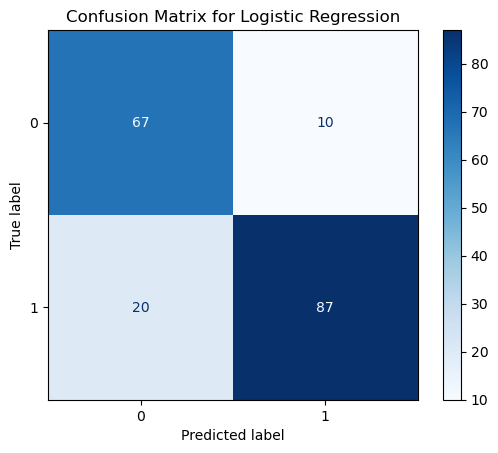

2024/12/19 19:10:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run resilient-owl-319 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1/runs/5f9c6b693eb44f699a429277fc24cdb7
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1
Training Ridge Classifier...
Classification Report for Ridge Classifier:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        77
           1       0.90      0.77      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.83      0.82      0.82       184



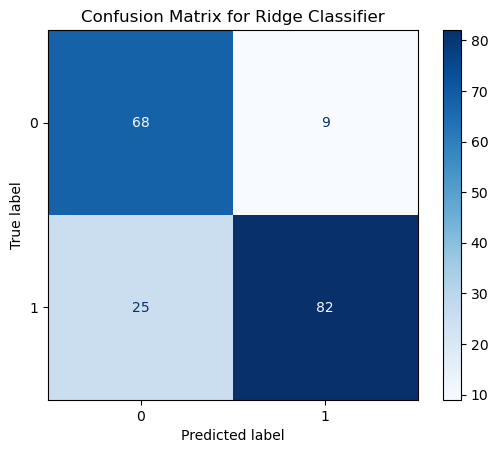

2024/12/19 19:10:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run youthful-ant-569 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1/runs/aea6a4f0dc1b4c58a45742cbb6476e97
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1
Training Random Forest Classifier...
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



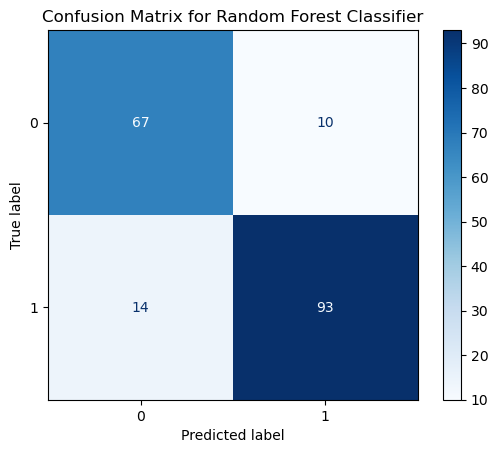

2024/12/19 19:10:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run resilient-fawn-171 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1/runs/21596cb8002b41c89597daac28433aa7
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1
Training XGBoost Classifier...
Classification Report for XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



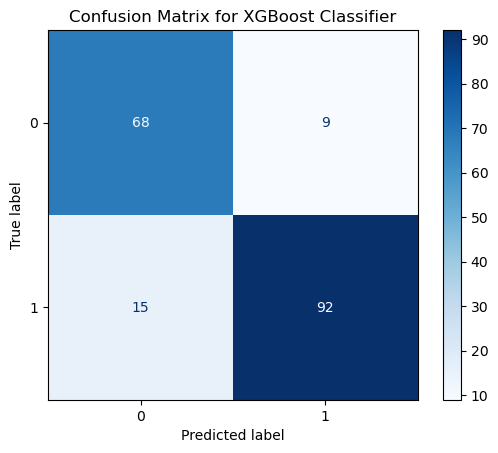

2024/12/19 19:11:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run traveling-pug-598 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1/runs/6626611feca2402689ed0dc24217ea21
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/1


In [153]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assume df is your DataFrame containing features and target column
# Features (X) and target variable (y)
X = df.drop(columns=["HeartDisease"])  # Drop the target column (Heart Disease)
y = df["HeartDisease"]  # Target column (Heart Disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing pipeline
def create_pipeline(model):
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns  # Auto-detect numeric features
    categorical_features = X.select_dtypes(include=['object']).columns  # Auto-detect categorical features
    
    # Preprocessing steps
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('minmax', MinMaxScaler()),
        ('log', FunctionTransformer(np.log1p, validate=True))
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Full pipeline with model
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', model)])
    return full_pipeline

# Run experiment with different models
def run_experiment(X_train, y_train, X_test, y_test):
    # Set the experiment name in MLFlow (creates a new experiment or uses an existing one)
    mlflow.set_experiment('Experiment-2')  # Set experiment name
    
    models = {
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
        "Ridge Classifier": RidgeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(random_state=42),
        "XGBoost Classifier": XGBClassifier(random_state=42)
    }
    
    i=1
    # Iterate through each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")
       
        # Create the pipeline with the selected model
        pipeline = create_pipeline(model)
        
        # 3-fold cross-validation for evaluating model
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='f1')
        cv_results_mean = np.mean(cv_results)
        cv_results_std = np.std(cv_results)
        
        # Log the model and cross-validation results with MLFlow
        with mlflow.start_run():
            mlflow.log_param('model_name', model_name)
            mlflow.log_metric(f'{model_name}_CV_mean_f1', cv_results_mean)
            mlflow.log_metric(f'{model_name}_CV_std_f1', cv_results_std)
            
            # Train the model
            pipeline.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = pipeline.predict(X_test)
            
            # Generate and log the classification report
            report = classification_report(y_test, y_pred)
            print(f"Classification Report for {model_name}:\n", report)
            mlflow.log_text(report, f"{model_name}_classification_report.txt")
            
            # Generate and log confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = cm.ravel()
            mlflow.log_metric(f'{model_name}_f1_score', f1_score(y_test, y_pred))
            F1_dictionary[f'Experiment_2_{i}']= f1_score(y_test, y_pred)
            mlflow.log_metric(f'{model_name}_TN', tn)
            mlflow.log_metric(f'{model_name}_FP', fp)
            mlflow.log_metric(f'{model_name}_FN', fn)
            mlflow.log_metric(f'{model_name}_TP', tp)
        
            
            # Log confusion matrix plot
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['model'].classes_)
            disp.plot(cmap=plt.cm.Blues, values_format="d")
            plt.title(f"Confusion Matrix for {model_name}")
            plt.show()
            
            # Log the model
            mlflow.sklearn.log_model(pipeline, f"{model_name}_model")
            
            # Optionally log the entire cross-validation result object
            # mlflow.log_artifact(grid_search.cv_results_)

        i+=1
# Run the experiment
run_experiment(X_train, y_train, X_test, y_test)


2024/12/19 19:11:12 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_3' does not exist. Creating a new experiment.


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



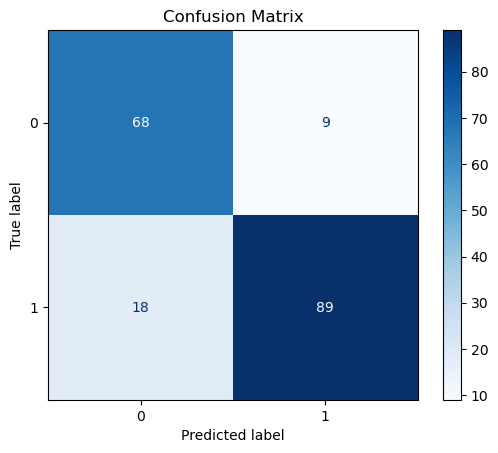

2024/12/19 19:11:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run enchanting-stork-281 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/2/runs/4d572a7213fe4de2ab60235a436c8008
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/2


In [155]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing features and target column
# Features (X) and target variable (y)
X = df.drop(columns=["HeartDisease"])  # Drop the target column (Heart Disease)
y = df["HeartDisease"]  # Target column (Heart Disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering Function
def feature_engineering(X):
    # Example feature engineering:
    # 1. Create new feature: 'age_times_cholesterol' by combining 'Age' and 'Cholesterol'
    if 'Age' in X.columns and 'Cholesterol' in X.columns:
        X['age_times_cholesterol'] = X['Age'] * X['Cholesterol']

    # 2. Fill missing values (if any)
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # 3. Create interaction terms (multiplying two numeric features, for example)
    if 'Age' in X_imputed.columns and 'MaxHR' in X_imputed.columns:
        X_imputed['age_maxHR_interaction'] = X_imputed['Age'] * X_imputed['MaxHR']

    # Return the transformed data
    return X_imputed

# Define the preprocessing pipeline with feature engineering
def create_pipeline(model):
    # Apply feature engineering to training and testing data
    X_train_transformed = feature_engineering(X_train)
    X_test_transformed = feature_engineering(X_test)
    
    numeric_features = X_train_transformed.select_dtypes(include=['float64', 'int64']).columns  # Numeric features
    categorical_features = X_train_transformed.select_dtypes(include=['object']).columns  # Categorical features
    
    # Preprocessing steps
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Full pipeline with feature engineering and model
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', model)])
    return full_pipeline, X_train_transformed, X_test_transformed

# Run experiment with feature engineering and model training
def run_experiment(X_train, y_train, X_test, y_test):
    # Set the experiment name in MLFlow (creates a new experiment or uses an existing one)
    mlflow.set_experiment('Experiment_3')  # Set experiment name
    
    # Logistic Regression model for example
    model = LogisticRegression(random_state=42, max_iter=1000)

    # Create the pipeline with feature engineering and the selected model
    pipeline, X_train_transformed, X_test_transformed = create_pipeline(model)
    
    # Train the model
    with mlflow.start_run():
        # Train the model
        pipeline.fit(X_train_transformed, y_train)
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test_transformed)
        
        # Generate and log the classification report
        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)
        mlflow.log_text(report, "classification_report.txt")
        
        # Generate and log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        mlflow.log_metric('f1_score', f1_score(y_test, y_pred))
        F1_dictionary[f'Experiment_3']= f1_score(y_test, y_pred)
        mlflow.log_metric('TN', tn)
        mlflow.log_metric('FP', fp)
        mlflow.log_metric('FN', fn)
        mlflow.log_metric('TP', tp)
        
        # Log confusion matrix plot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['model'].classes_)
        disp.plot(cmap=plt.cm.Blues, values_format="d")
        plt.title("Confusion Matrix")
        plt.show()
        
        # Log the model
        mlflow.sklearn.log_model(pipeline, 'model')
        
        # Optionally log the feature-engineered data as artifacts (optional, if large datasets)
        # mlflow.log_artifact('path_to_feature_engineered_data.csv')

# Run the experiment
run_experiment(X_train, y_train, X_test, y_test)


2024/12/19 19:11:41 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_4' does not exist. Creating a new experiment.


Dropped features due to high correlation: []
Correlation Threshold Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



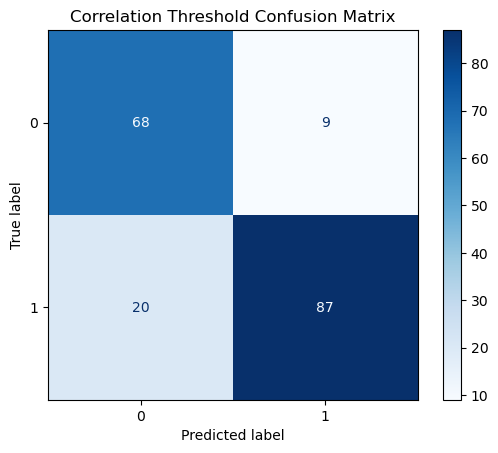

2024/12/19 19:11:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run efficient-goat-202 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/3/runs/e210193665c24142a8668628d0601bcb
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/3
Selected important features: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'chestPainType', 'restingECG', 'st_slope', 'age_category']
Feature Importance Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



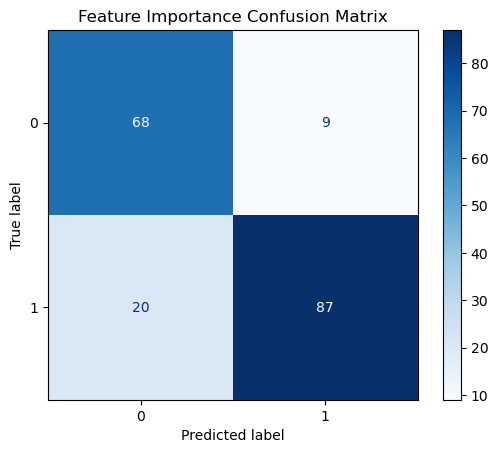

2024/12/19 19:11:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run auspicious-wolf-425 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/3/runs/d5f351ab2e734036a398abe40d6d47ff
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/3
Selected features based on variance threshold: Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'chestPainType', 'restingECG', 'st_slope',
       'age_category'],
      dtype='object')
Variance Threshold Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



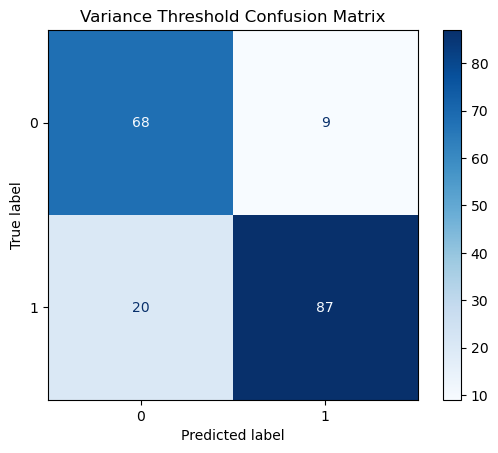

2024/12/19 19:12:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run melodic-elk-528 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/3/runs/6723bfafcffa44d2a853de067ffe9a51
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/3


In [157]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing features and target column
# Features (X) and target variable (y)
X = df.drop(columns=["HeartDisease"])  # Drop the target column (Heart Disease)
y = df["HeartDisease"]  # Target column (Heart Disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Correlation Threshold for Feature Selection
def correlation_threshold(X, threshold=0.9):
    # Compute correlation matrix
    corr_matrix = X.corr().abs()
    
    # Select upper triangle of correlation matrix (since it's symmetric)
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    # Drop the correlated features
    X_filtered = X.drop(columns=to_drop)
    
    print(f"Dropped features due to high correlation: {to_drop}")
    
    return X_filtered

# 2. Feature Importance for Feature Selection (using RandomForest)
def feature_importance(X, y):
    # Fit Random Forest classifier to get feature importances
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    
    # Get feature importances
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
    important_features = feature_importances[feature_importances > 0.01].index.tolist()  # Selecting important features
    
    print(f"Selected important features: {important_features}")
    
    # Return the reduced dataset with important features
    X_filtered = X[important_features]
    return X_filtered, important_features

# 3. Variance Threshold for Feature Selection
def variance_threshold(X, threshold=0.01):
    # Apply Variance Threshold
    selector = VarianceThreshold(threshold=threshold)
    X_filtered = selector.fit_transform(X)
    
    # Get the selected feature names
    selected_features = X.columns[selector.get_support()]
    
    print(f"Selected features based on variance threshold: {selected_features}")
    
    return pd.DataFrame(X_filtered, columns=selected_features)

# Function to train model and log results
def train_and_log_model(X_train, y_train, X_test, y_test, selected_features, method_name,i):
    model = LogisticRegression(random_state=42, max_iter=1000)
    
    # Train the model
    with mlflow.start_run():
        # Train the model with selected features
        model.fit(X_train[selected_features], y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test[selected_features])
        
        # Generate and log the classification report
        report = classification_report(y_test, y_pred)
        print(f"{method_name} Classification Report:\n", report)
        mlflow.log_text(report, f"{method_name}_classification_report.txt")
        
        # Generate and log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        mlflow.log_metric(f"{method_name}_f1_score", f1_score(y_test, y_pred))
        F1_dictionary[f'Experiment_4_{i}']= f1_score(y_test, y_pred)
        mlflow.log_metric(f"{method_name}_TN", tn)
        mlflow.log_metric(f"{method_name}_FP", fp)
        mlflow.log_metric(f"{method_name}_FN", fn)
        mlflow.log_metric(f"{method_name}_TP", tp)
        
        # Log confusion matrix plot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format="d")
        plt.title(f"{method_name} Confusion Matrix")
        plt.show()
        
        # Log the model
        mlflow.sklearn.log_model(model, f'{method_name}_model')
        
        # Optionally log the feature-selected data as artifacts (optional)
        # mlflow.log_artifact('path_to_feature_selected_data.csv')

# Run separate experiments for each method
def run_experiments(X_train, y_train, X_test, y_test):
    # Set the experiment name in MLFlow (creates a new experiment or uses an existing one)
    mlflow.set_experiment('Experiment_4')  # Set experiment name
    
    # **Correlation Threshold** Feature Selection
    X_train_corr_selected = correlation_threshold(X_train)
    X_test_corr_selected = X_test[X_train_corr_selected.columns]  # Ensure test set has the same columns
    train_and_log_model(X_train, y_train, X_test, y_test, X_train_corr_selected.columns, "Correlation Threshold",1)
    
    # **Feature Importance** Feature Selection (using Random Forest)
    X_train_imp_selected, important_features = feature_importance(X_train, y_train)
    X_test_imp_selected = X_test[important_features]  # Ensure test set has the same features
    train_and_log_model(X_train, y_train, X_test, y_test, important_features, "Feature Importance",2)
    
    # **Variance Threshold** Feature Selection
    X_train_var_selected = variance_threshold(X_train)
    X_test_var_selected = X_test[X_train_var_selected.columns]  # Ensure test set has the same columns
    train_and_log_model(X_train, y_train, X_test, y_test, X_train_var_selected.columns, "Variance Threshold",3)

# Run all the experiments
run_experiments(X_train, y_train, X_test, y_test)


2024/12/19 19:12:19 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_5: PCA for Dimensionality Reduction' does not exist. Creating a new experiment.


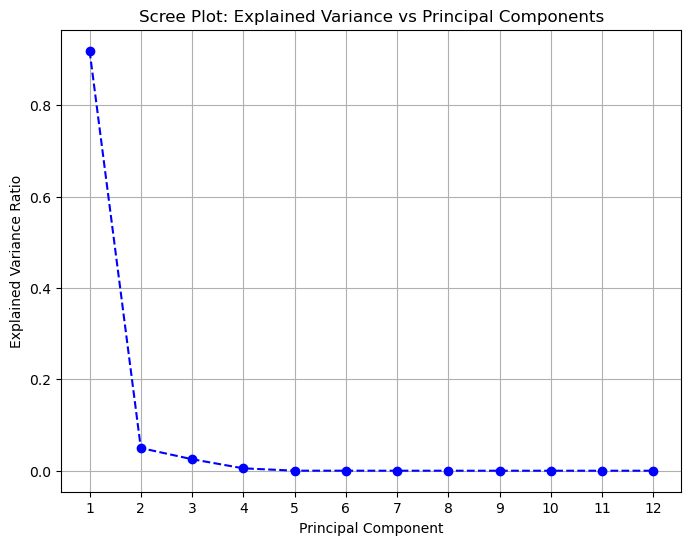

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59        77
           1       0.70      0.64      0.67       107

    accuracy                           0.64       184
   macro avg       0.63      0.63      0.63       184
weighted avg       0.64      0.64      0.64       184



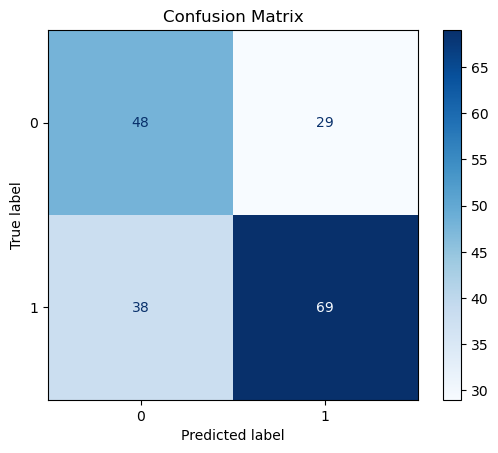

2024/12/19 19:12:27 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/12/19 19:12:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/19 19:12:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run unleashed-conch-193 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/4/runs/63df903fb2754dfc9ebc0460c658758f
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/4


In [158]:
import mlflow
import mlflow.sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame containing features and target column
# Features (X) and target variable (y)
X = df.drop(columns=["HeartDisease"])  # Drop the target column (Heart Disease)
y = df["HeartDisease"]  # Target column (Heart Disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to apply PCA and log results
def pca_experiment(X_train, X_test, y_train, y_test):
    # Set the experiment name in MLFlow (creates a new experiment or uses an existing one)
    mlflow.set_experiment('Experiment_5: PCA for Dimensionality Reduction')
    
    with mlflow.start_run():
        # Apply PCA
        pca = PCA()
        pca.fit(X_train)
        
        # Explained variance ratio (for scree plot)
        explained_variance = pca.explained_variance_ratio_
        
        # Create a scree plot to show the explained variance by each component
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
        plt.title("Scree Plot: Explained Variance vs Principal Components")
        plt.xlabel("Principal Component")
        plt.ylabel("Explained Variance Ratio")
        plt.xticks(range(1, len(explained_variance) + 1))
        plt.grid(True)
        
        # Save scree plot to MLFlow
        scree_plot_path = "scree_plot.png"
        plt.savefig(scree_plot_path)
        mlflow.log_artifact(scree_plot_path)  # Log the scree plot to MLFlow
        plt.show()
        
        # Select the number of components based on the explained variance (e.g., choose enough components to explain > 95% of the variance)
        cumulative_variance = np.cumsum(explained_variance)
        num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Select components explaining 95% variance
        
        # Apply PCA with selected components
        pca = PCA(n_components=num_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Train a Logistic Regression model with the selected PCA components
        model = LogisticRegression(random_state=42, max_iter=1000)
        model.fit(X_train_pca, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test_pca)
        
        # Generate and log the classification report
        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)
        mlflow.log_text(report, "classification_report.txt")
        
        # Generate and log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        mlflow.log_metric('f1_score', f1_score(y_test, y_pred))
        F1_dictionary[f'Experiment_5']= f1_score(y_test, y_pred)
        mlflow.log_metric('TN', tn)
        mlflow.log_metric('FP', fp)
        mlflow.log_metric('FN', fn)
        mlflow.log_metric('TP', tp)
        
        # Log confusion matrix plot
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues, values_format="d")
        plt.title("Confusion Matrix")
        plt.show()
        
        # Log the PCA model
        mlflow.sklearn.log_model(pca, 'pca_model')
        mlflow.sklearn.log_model(model, 'logistic_regression_model')

# Run PCA experiment
pca_experiment(X_train, X_test, y_train, y_test)


Experiment #6 is a custom machine learning workflow designed to apply data preprocessing, feature engineering, model training, and hyperparameter tuning. It includes a preprocessing pipeline with scaling and encoding for both numerical and categorical features. Multiple classification models—Logistic Regression, Random Forest, and SVC—are trained, and hyperparameter optimization is performed using GridSearchCV. The best model configurations and their corresponding hyperparameters are logged in MLFlow. Model performance is evaluated with metrics like F1-score, accuracy, ROC AUC, and confusion matrices, all logged for easy tracking and comparison.








Training LogisticRegression model...


2024/12/19 19:12:43 INFO mlflow.tracking.fluent: Experiment with name 'Experiment-6' does not exist. Creating a new experiment.
2024/12/19 19:12:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run sincere-midge-827 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/4/runs/f8f70a94ea684edf84e81419ff345423
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/4
Training RandomForest model...


2024/12/19 19:13:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run unequaled-sponge-760 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/5/runs/8961f71e0e444fb485a3d2d5063782de
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/5
Training SVC model...


2024/12/19 19:13:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run legendary-duck-66 at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/5/runs/e9c88a85a6ff4eba839b64c8e5c01d12
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/5


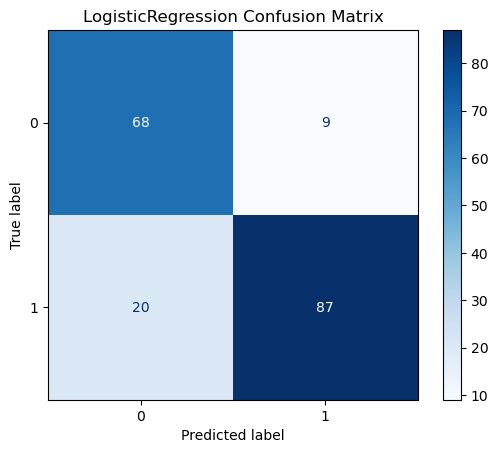

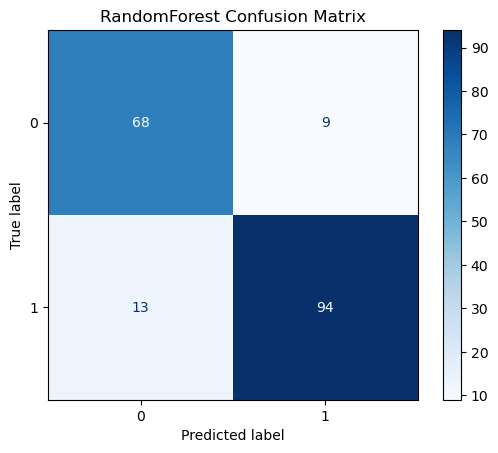

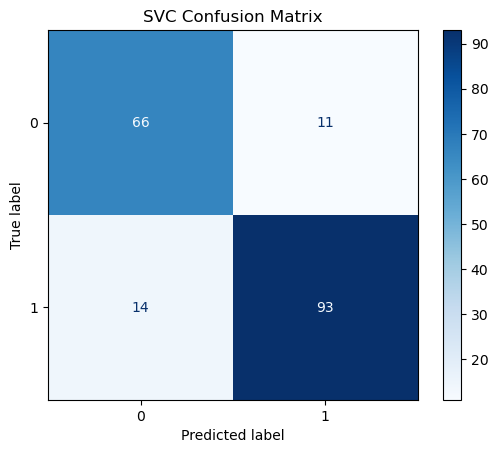

In [160]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing features and target column
X = df.drop(columns=["HeartDisease"])  # Features
y = df["HeartDisease"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Use sparse_output=False
        ]), categorical_features)
    ]
)

# Define a classification pipeline
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

# Define models
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42)  # Added probability=True
}

# Hyperparameter tuning using GridSearchCV (for example, with RandomForest)
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear'],
    },
    'RandomForest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20],
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    }
}

# Function to train and log results
def train_and_log_model(model_name, model, X_train, y_train, X_test, y_test,i, param_grid=None):
    # End any active MLFlow run before starting a new one
    mlflow.end_run()  # Ensures that any previous run is properly closed
    
    # Ensure we start a new MLFlow run and log results properly
    with mlflow.start_run():
        # Log the experiment name
        mlflow.set_experiment("Experiment-6")  # Name the experiment explicitly
        
        # Define the pipeline with the model
        pipeline = create_pipeline(model)
        
        best_params = None  # Variable to store best parameters
        
        if param_grid:
            # Hyperparameter tuning
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
            best_params = grid_search.best_params_  # Get best hyperparameters
            mlflow.log_params(best_params)  # Log the best parameters
        else:
            pipeline.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For AUC, predict probabilities
        classification_rep = classification_report(y_test, y_pred)
        
        # Log metrics
        mlflow.log_metric(f'{model_name}_f1_score', f1)
        F1_dictionary[f'Experiment_6_{i}']= f1_score(y_test, y_pred)
        mlflow.log_metric(f'{model_name}_accuracy', accuracy)
        mlflow.log_metric(f'{model_name}_roc_auc', roc_auc)
        
        # Log classification report
        mlflow.log_text(classification_rep, f"{model_name}_classification_report.txt")
        
        # Generate and log confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"{model_name} Confusion Matrix")
        plt.savefig(f"{model_name}_confusion_matrix.png")
        mlflow.log_artifact(f"{model_name}_confusion_matrix.png")
        
        # Log the trained model
        mlflow.sklearn.log_model(model, f'{model_name}_model')

# Execute experiment with all models
def execute_custom_experiment(X_train, X_test, y_train, y_test):
    i=1
    for model_name, model in models.items():
        
        print(f"Training {model_name} model...")
        param_grid = param_grids.get(model_name)  # Get the correct param_grid
        train_and_log_model(model_name, model, X_train, y_train, X_test, y_test,i, param_grid)
        i+=1

# Run the custom experiment
execute_custom_experiment(X_train, X_test, y_train, y_test)


Experiment 7 involves evaluating the performance of Support Vector Machine (SVM) models with different kernels: linear, radial basis function (RBF), polynomial, and sigmoid. The experiment includes hyperparameter tuning using GridSearchCV for each model, optimizing parameters such as C, gamma, and degree for the polynomial kernel. The models are trained and evaluated on a binary classification task, with performance metrics like F1-score, accuracy, and ROC-AUC logged in MLFlow. Additionally, confusion matrices and classification reports are generated and stored as artifacts. This experiment aims to compare the effectiveness of different SVM kernels in solving the classification problem.

Training SVM Linear...


2024/12/19 19:17:52 INFO mlflow.tracking.fluent: Experiment with name 'Experiment-7' does not exist. Creating a new experiment.


SVM Linear - F1 Score: 0.8627450980392157, Accuracy: 0.8478260869565217, ROC AUC: 0.8925840514625561
{'0': {'precision': 0.7816091954022989, 'recall': 0.8831168831168831, 'f1-score': 0.8292682926829268, 'support': 77.0}, '1': {'precision': 0.9072164948453608, 'recall': 0.822429906542056, 'f1-score': 0.8627450980392157, 'support': 107.0}, 'accuracy': 0.8478260869565217, 'macro avg': {'precision': 0.8444128451238299, 'recall': 0.8527733948294696, 'f1-score': 0.8460066953610712, 'support': 184.0}, 'weighted avg': {'precision': 0.8546525706219055, 'recall': 0.8478260869565217, 'f1-score': 0.8487357827542469, 'support': 184.0}}
🏃 View run SVM Linear at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/5/runs/204bc20067474b2e8005a4cd957d7a26
🧪 View experiment at: https://dagshub.com/diya.pati.1998/Final_project_EAS503.mlflow/#/experiments/5
Training SVM RBF...
SVM RBF - F1 Score: 0.8815165876777251, Accuracy: 0.8641304347826086, ROC AUC: 0.9338511955334384
{'0': {

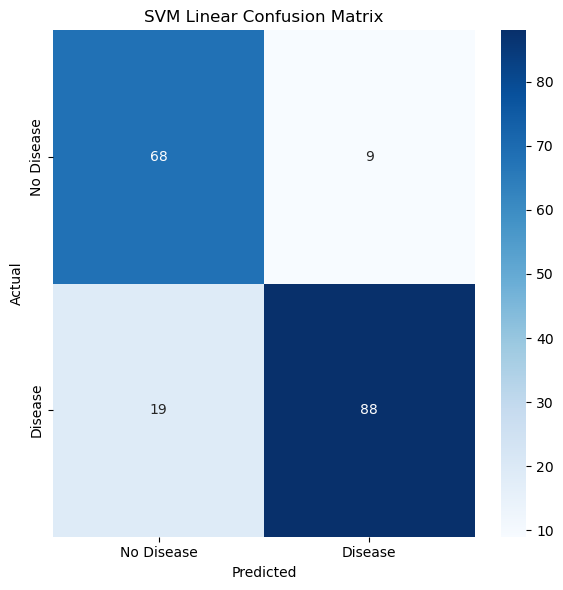

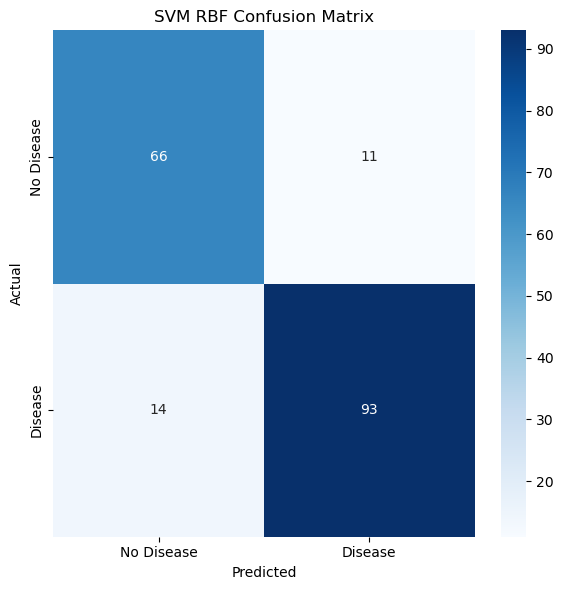

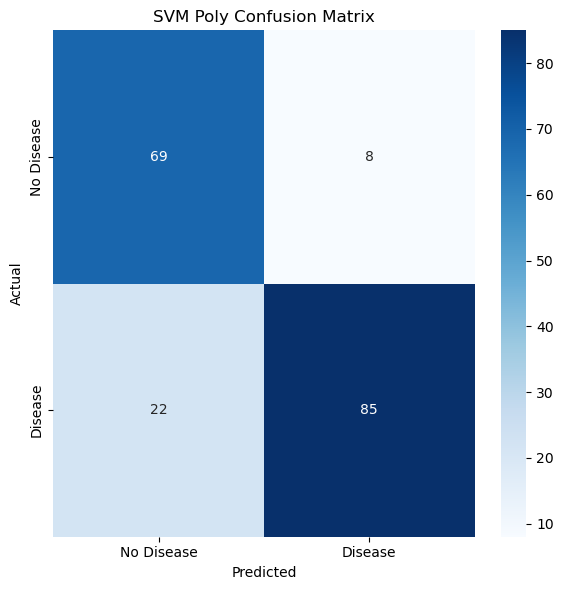

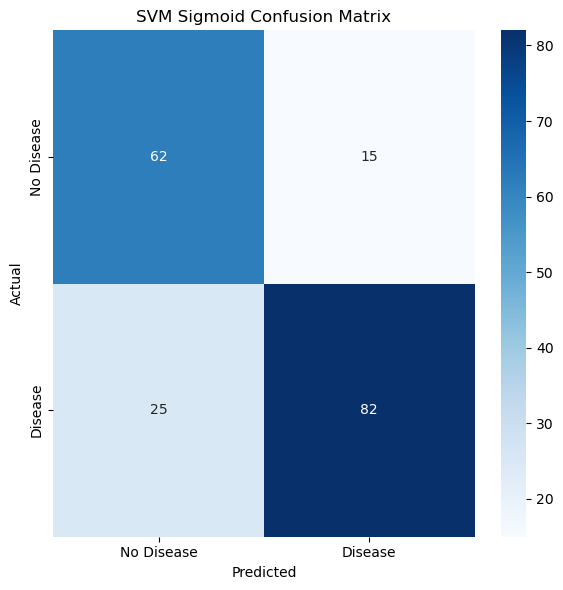

In [179]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your dataset)
# Assuming df is your DataFrame containing features and target column
X = df.drop(columns=["HeartDisease"])  # Features
y = df["HeartDisease"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the pipeline for SVM models
def create_pipeline(kernel_type):
    return Pipeline([
        ('scaler', StandardScaler()),  # Scaling features
        ('svm', SVC(kernel=kernel_type, probability=True, random_state=42))  # SVM with different kernels
    ])

# Define model names and kernels
models = {
    "SVM Linear": create_pipeline('linear'),
    "SVM RBF": create_pipeline('rbf'),
    "SVM Poly": create_pipeline('poly'),
    "SVM Sigmoid": create_pipeline('sigmoid')
}

# Function to train models, log metrics, and log confusion matrix
def train_and_log_model(model_name, model, X_train, y_train, X_test, y_test,i):
    with mlflow.start_run(run_name=model_name):  # Start new MLFlow run for each model
        # Train the model
        mlflow.set_experiment("Experiment-7")
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Log metrics
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # For AUC, predict probabilities
        
        # Log parameters
        mlflow.log_param('kernel', model.named_steps['svm'].kernel)
        
        # Log metrics
        mlflow.log_metric('f1_score', f1)
        F1_dictionary[f'Experiment_7_{i}']= f1_score(y_test, y_pred)
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('roc_auc', roc_auc)

        # Log classification report
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        mlflow.log_dict(classification_rep, 'classification_report.json')

        # Log confusion matrix as image
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        cm_image = f'confusion_matrix_{model_name}.png'
        plt.savefig(cm_image)
        mlflow.log_artifact(cm_image)

        print(f"{model_name} - F1 Score: {f1}, Accuracy: {accuracy}, ROC AUC: {roc_auc}")
        print(classification_rep)

# Run the custom experiment and log results for each SVM model
def execute_custom_experiment(X_train, X_test, y_train, y_test):
    i=1
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        train_and_log_model(model_name, model, X_train, y_train, X_test, y_test,i)
        i+=1

# Execute the experiment
execute_custom_experiment(X_train, X_test, y_train, y_test)


In [181]:
F1_dictionary

{'Experiment_1': 0.8682926829268293,
 'Experiment_2_1': 0.8529411764705882,
 'Experiment_2_2': 0.8282828282828283,
 'Experiment_2_3': 0.8857142857142857,
 'Experiment_2_4': 0.8846153846153846,
 'Experiment_3': 0.8682926829268293,
 'Experiment_4_1': 0.8571428571428571,
 'Experiment_4_2': 0.8571428571428571,
 'Experiment_4_3': 0.8571428571428571,
 'Experiment_5': 0.6731707317073171,
 'Experiment_6_1': 0.8571428571428571,
 'Experiment_6_2': 0.8952380952380953,
 'Experiment_6_3': 0.8815165876777251,
 'Experiment_7_1': 0.8627450980392157,
 'Experiment_7_2': 0.8815165876777251,
 'Experiment_7_3': 0.85,
 'Experiment_7_4': 0.803921568627451}

In [175]:
F1_dictionary.pop("Experiment_7_4")

0.803921568627451

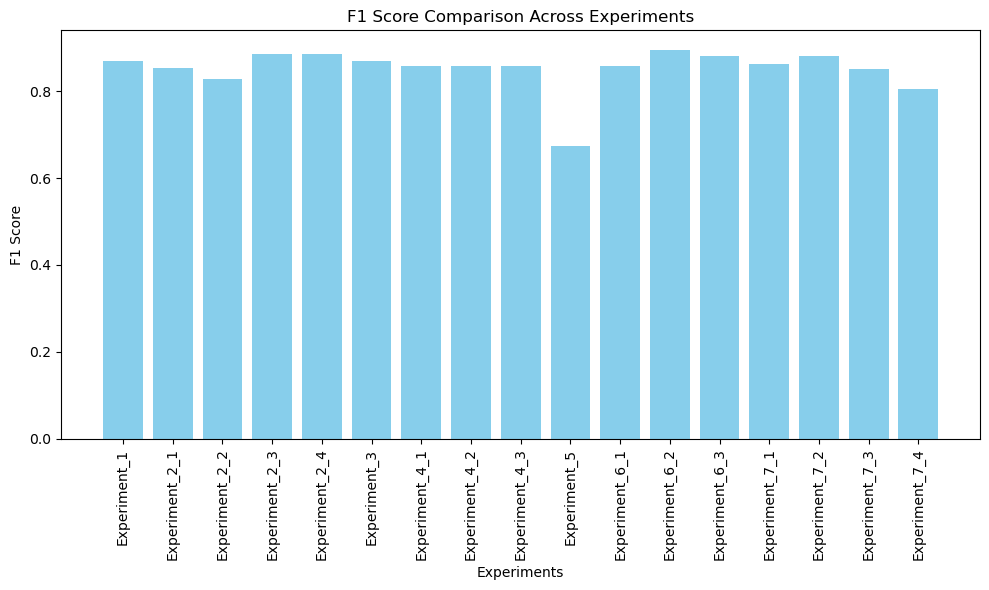

In [187]:
experiments = list(F1_dictionary.keys())
f1_scores = list(F1_dictionary.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(experiments, f1_scores, color='skyblue')

# Add labels and title
plt.xlabel('Experiments')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Across Experiments')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


In [195]:
max_experiment = max(F1_dictionary, key=F1_dictionary.get)
max_value = F1_dictionary[max_experiment]

# Display the highest value item
print(f"The experiment with the highest F1 score is {max_experiment} with a score of {max_value}.")

The experiment with the highest F1 score is Experiment_6_2 with a score of 0.8952380952380953.


F1 Score: 0.7804878048780488
Accuracy: 0.7554347826086957
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.72        77
           1       0.82      0.75      0.78       107

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184



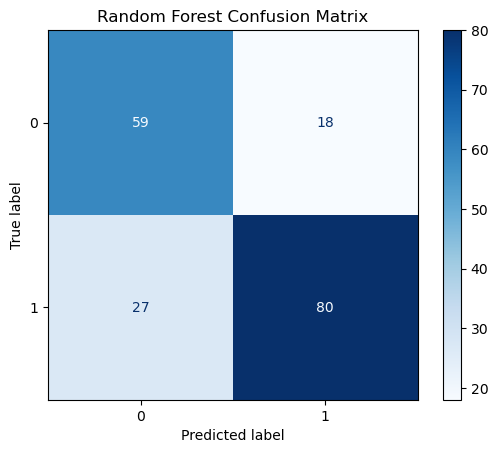

Model saved as 'random_forest_model.pkl'


In [216]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing features and target column
X = df.drop(columns=["HeartDisease"])  # Features
y = df["HeartDisease"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Use sparse_output=False
        ]), categorical_features)
    ]
)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42,max_depth = 10, n_estimators = 200)

# Combine preprocessing and model into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Save the trained pipeline to a file
joblib.dump(pipeline, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


In [222]:
# Save the trained pipeline to a .joblib file
joblib.dump(pipeline, 'random_forest_model.joblib')
print("Model saved as 'random_forest_model.joblib'")


Model saved as 'random_forest_model.joblib'


In [228]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,42,120,240,1,194,0.8
25,36,130,209,0,178,0.0
84,56,150,213,1,125,1.0
10,37,130,211,0,142,0.0
344,51,120,0,1,104,0.0


In [264]:
import joblib
import numpy as np
import pandas as pd

# Load the model
model = joblib.load('random_forest_model.joblib')

# Example input
features = [12,100, 100, 0, 180,0]  # Replace with your actual test features

# Convert to DataFrame with the correct columns
columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
data = np.array(features).reshape(1, -1)
df = pd.DataFrame(data, columns=columns)

# Make prediction
prediction = model.predict(df)

print(f"Prediction: {prediction}")


Prediction: [0]


In [272]:
import requests
import json

url = 'http://127.0.0.1:8000/predict'
data = {
    "feature_vector": [12, 100, 100, 0, 180, 0]
}

response = requests.post(url, json=data)

print(response.json())


{'prediction': [0]}


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,12,100,100,0,180,0
